In [2]:
%config Completer.use_jedi = False

In [3]:
from rasterio.warp import transform
from rasterio.crs import CRS

In [28]:
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

Stationsstraat 205
2910 Essen
51,462935° - 4,453936°

In [25]:
DTM_tif_loc = r'C:\Users\simon\PycharmProjects\3D_houses\data\DTM\GeoTIFF\DHMVIIDTMRAS1m_k01.tif'
DTM = rasterio.open(DTM_tif_loc)

In [26]:
DSM_tif_loc = r'C:\Users\simon\PycharmProjects\3D_houses\data\DSM\GeoTIFF\DHMVIIDSMRAS1m_k01.tif'
DSM = rasterio.open(DSM_tif_loc)

In [44]:
with rio.open(DTM_tif_loc) as src:
    lidar_dtm_im = src.read()
    dTm_meta = src.profile

In [45]:
with rio.open(DSM_tif_loc) as src:
    lidar_dsm_im = src.read()
    dsm_meta = src.profile

In [46]:
lidar_dsm_im

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [47]:
lidar_dtm_im

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.693e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.686e+01,
          1.688e+01,  1.690e+01]]], dtype=float32)

In [48]:
lidar_chm = lidar_dsm_im - lidar_dem_im

In [49]:
lidar_chm

masked_array(
  data=[[[--, --, --, ..., 0.0, 0.0, 0.0],
         [--, --, --, ..., 0.0, 0.0, 0.0],
         [--, --, --, ..., 0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.020000457763671875],
         [0.0, 0.0, 0.0, ..., 0.010000228881835938, 0.0,
          0.010000228881835938]]],
  mask=[[[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]],
  fill_value=-9999.0,
  dtype=float32)

In [23]:
chm.max()

9.910001

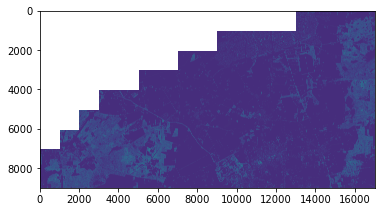

<AxesSubplot:>

In [50]:
show(lidar_chm)